In [52]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Preprocessing

In [5]:
df_twitter=pd.read_csv('C:/Users/rdeva/Downloads/train.csv')

In [6]:
df_twitter.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

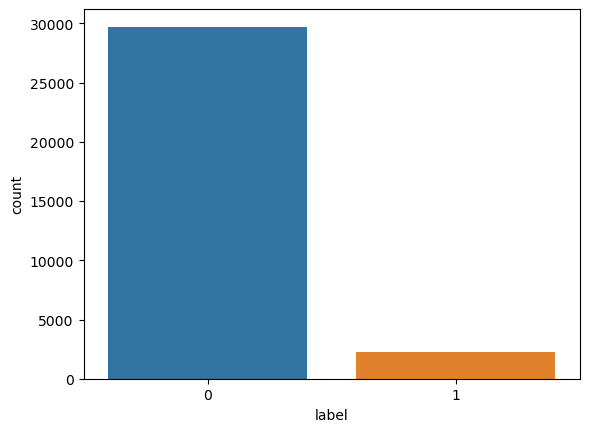

In [7]:
sns.countplot(x='label',data=df_twitter)

In [8]:
df_twitter.shape

(31962, 3)

In [9]:
df_twitter.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [10]:
df_twitter.drop('id',axis=1,inplace=True)

In [11]:
df_twitter

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [12]:
df_offensive=pd.read_csv("C:/Users/rdeva/Downloads/labeled_data.csv")
df_offensive.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [13]:
df_offensive.shape

(24783, 7)

In [14]:
df_offensive.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [15]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [16]:
df_offensive

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [17]:
df_offensive['class'].unique()

array([2, 1, 0], dtype=int64)

<Axes: xlabel='class', ylabel='count'>

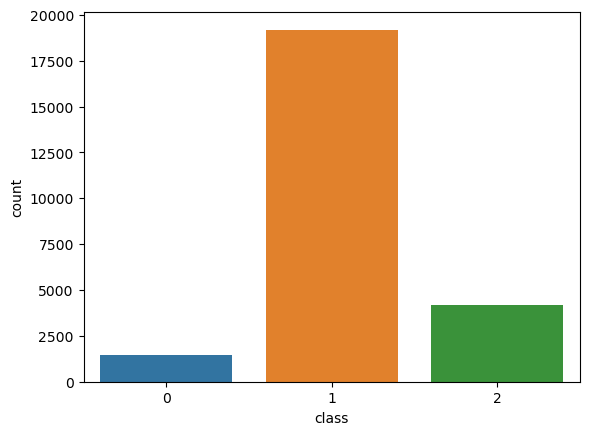

In [18]:
sns.countplot(x='class',data=df_offensive)

In [19]:
df_offensive[df_offensive['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [20]:
df_offensive["class"].replace({0: 1}, inplace=True)

In [21]:
df_offensive['class'].unique()

array([2, 1], dtype=int64)

<Axes: xlabel='class', ylabel='count'>

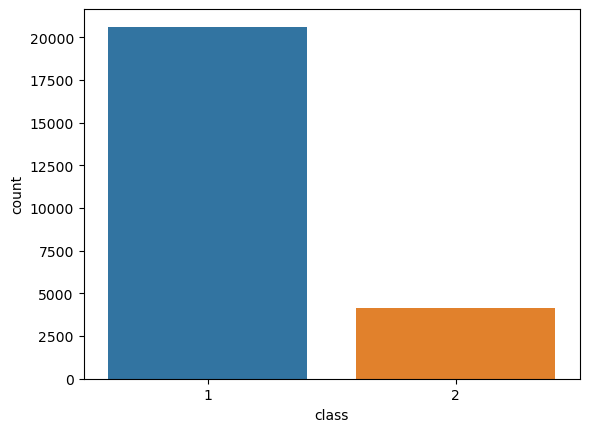

In [22]:
sns.countplot(x='class',data=df_offensive)

In [23]:
df_offensive["class"].replace({2: 0}, inplace=True)

<Axes: xlabel='class', ylabel='count'>

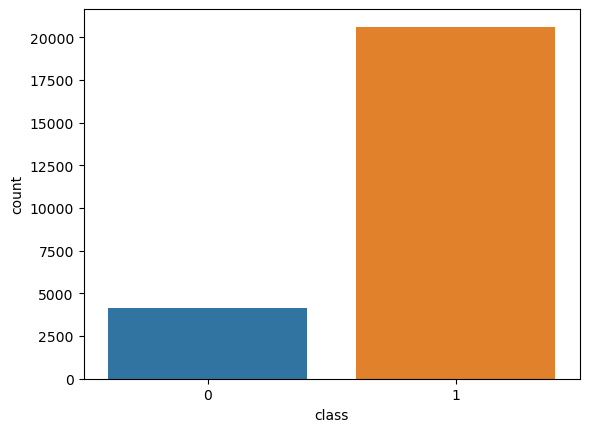

In [24]:
sns.countplot(x='class',data=df_offensive)

In [25]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)

In [26]:
df_offensive.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [27]:
frame=[df_twitter,df_offensive]
df = pd.concat(frame)
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


<Axes: xlabel='label', ylabel='count'>

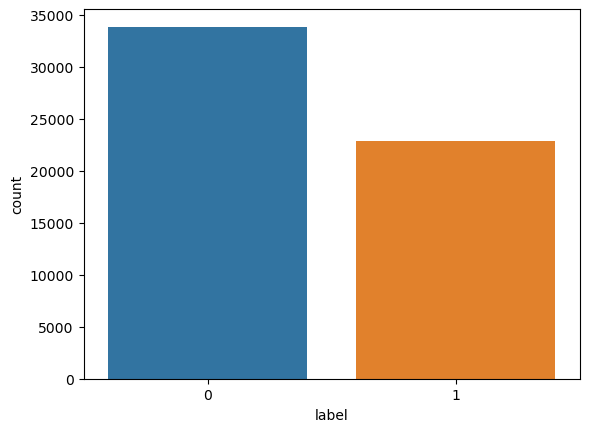

In [28]:
sns.countplot(x='label',data=df)

In [29]:
df.shape

(56745, 2)

In [30]:
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

In [41]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df['tweet']=df['tweet'].apply(clean_text)
df

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunc...
1,0,user user thank lyft credit cant use caus dont...
2,0,bihday majesti
3,0,model love u take u time urð± ððð...
4,0,factsguid societi motiv
...,...,...
24778,1,yous muthafin lie coreyemanuel right tl tras...
24779,0,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


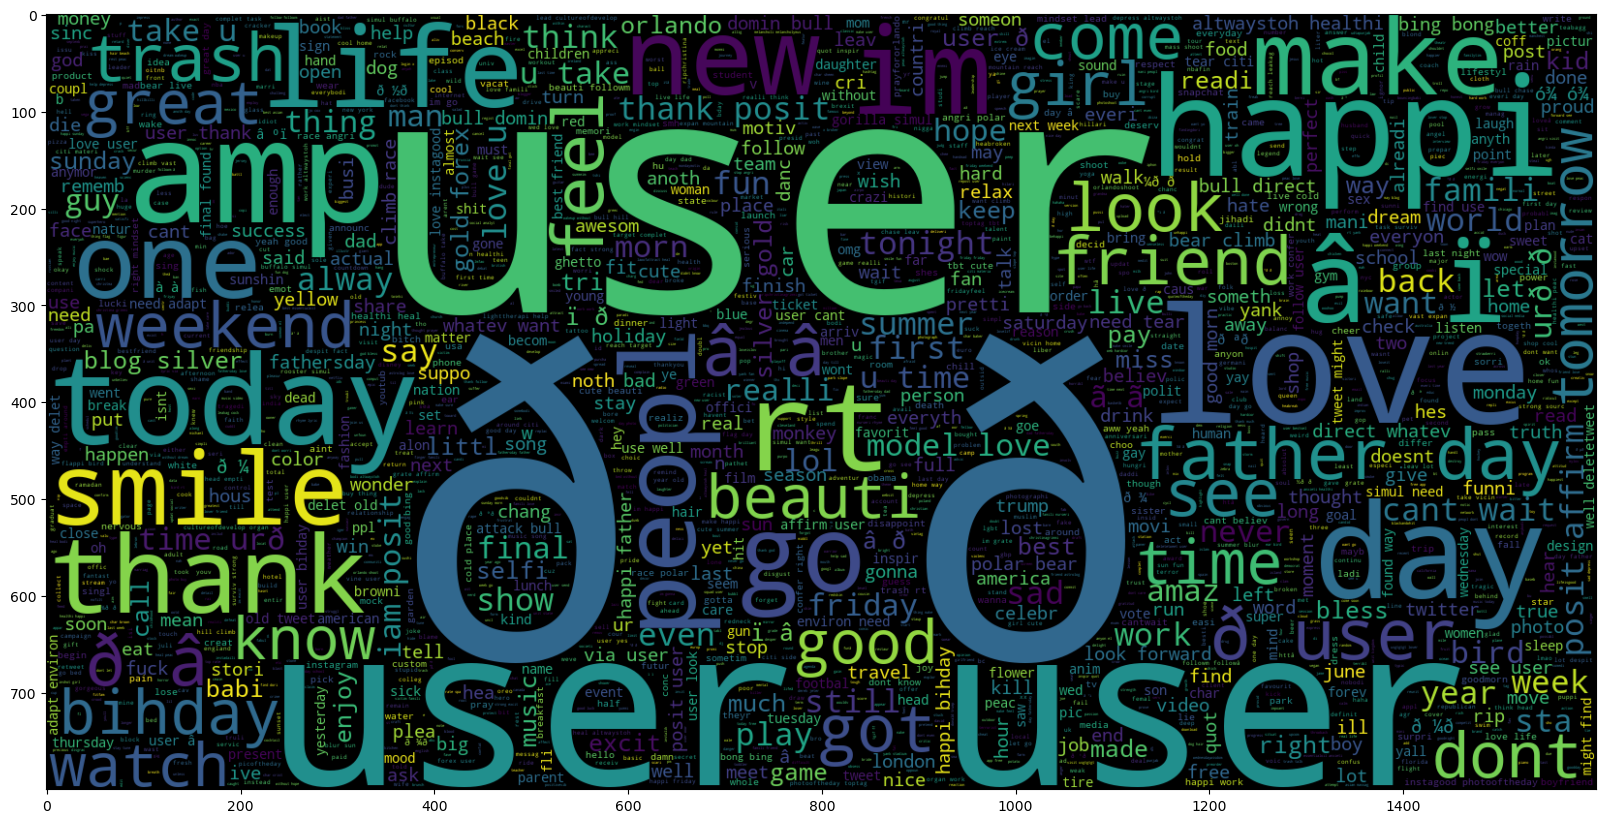

In [45]:
#Non Racist/Sexist tweets
plt.figure(figsize = (20,20)) 
wc1 = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df['label'] == 0].tweet))
plt.imshow(wc1 , interpolation = 'bilinear')

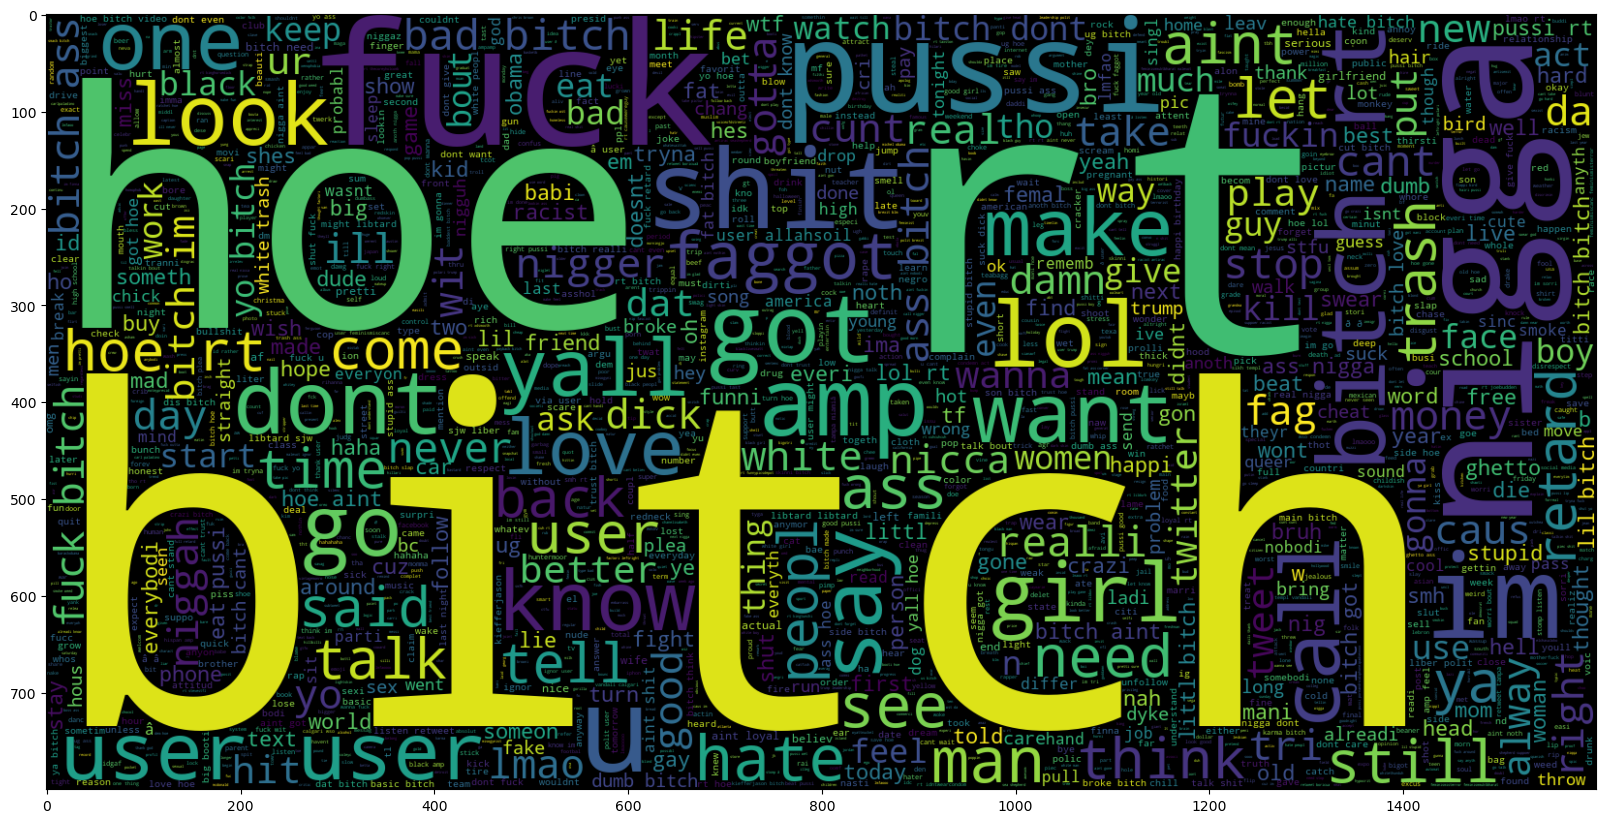

In [46]:
#Racist/Sexist tweets
plt.figure(figsize = (20,20)) 
wc1 = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df['label'] == 1].tweet))
plt.imshow(wc1 , interpolation = 'bilinear')

# Model Evaluation

In [32]:
x=df['tweet']
y=df['label']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

42558 42558
14187 14187


In [34]:
count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizer=count.fit_transform(x_train)
x_test_vectorizer = count.transform(x_test)

In [35]:
count.vocabulary_

{'pictur': 496965,
 'galleri': 244789,
 'live': 386374,
 'blackcavali': 78353,
 'caucasian': 105699,
 'webcam': 750931,
 'pictur galleri': 497099,
 'galleri live': 244792,
 'live blackcavali': 386462,
 'blackcavali caucasian': 78354,
 'caucasian webcam': 105705,
 'pictur galleri live': 497100,
 'galleri live blackcavali': 244793,
 'live blackcavali caucasian': 386463,
 'blackcavali caucasian webcam': 78355,
 'pictur galleri live blackcavali': 497101,
 'galleri live blackcavali caucasian': 244794,
 'live blackcavali caucasian webcam': 386464,
 'pictur galleri live blackcavali caucasian': 497102,
 'galleri live blackcavali caucasian webcam': 244795,
 'shoutout': 600018,
 'everybodi': 198100,
 'follow': 226779,
 'nicca': 455780,
 'shoutout everybodi': 600045,
 'everybodi follow': 198226,
 'follow nicca': 227264,
 'shoutout everybodi follow': 600046,
 'everybodi follow nicca': 198227,
 'shoutout everybodi follow nicca': 600047,
 'user': 703467,
 'bet': 56640,
 'second': 586131,
 'goal': 25

In [36]:
tfidf = TfidfTransformer()

x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

x_test_tfidf = tfidf.transform(x_test_vectorizer)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8453
           1       0.90      0.92      0.91      5734

    accuracy                           0.93     14187
   macro avg       0.92      0.93      0.92     14187
weighted avg       0.93      0.93      0.93     14187



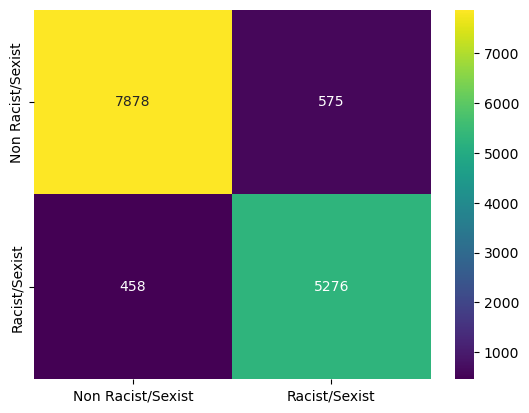

In [53]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)
accuracy1 = accuracy_score(y_test,prediction_vectorizer)
sns.heatmap(confusion_matrix(y_test,prediction_vectorizer),cmap='viridis',annot=True,fmt='.4g',xticklabels=['Non Racist/Sexist','Racist/Sexist'],yticklabels=['Non Racist/Sexist','Racist/Sexist'])
print (classification_report(y_test, prediction_vectorizer))

[[8213  240]
 [ 860 4874]]


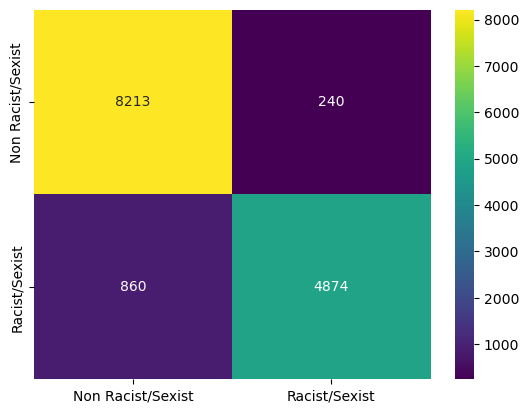

In [54]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
accuracy2 = accuracy_score(y_test,prediction_tfidf)
sns.heatmap(confusion_matrix(y_test, prediction_tfidf),cmap='viridis',annot=True,fmt='.4g',xticklabels=['Non Racist/Sexist','Racist/Sexist'],yticklabels=['Non Racist/Sexist','Racist/Sexist'])
print(confusion_matrix(y_test,prediction_tfidf))

C:\Users\rdeva\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8453
           1       0.98      0.84      0.91      5734

    accuracy                           0.93     14187
   macro avg       0.94      0.91      0.92     14187
weighted avg       0.93      0.93      0.93     14187



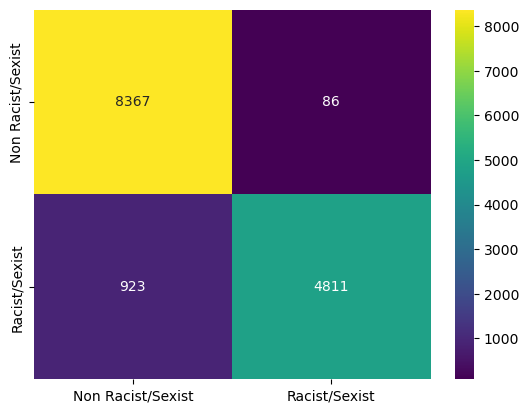

In [55]:
xgb_model=xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc' )
xgb_model_vectorizer = xgb_model.fit(x_train_vectorizer, y_train)
xgb_predictions_vectorizer=xgb_model_vectorizer.predict(x_test_vectorizer)
accuracy3 = accuracy_score(y_test,xgb_predictions_vectorizer)
sns.heatmap(confusion_matrix(y_test,xgb_predictions_vectorizer),cmap='viridis',annot=True,fmt='.4g',xticklabels=['Non Racist/Sexist','Racist/Sexist'],yticklabels=['Non Racist/Sexist','Racist/Sexist'])
print (classification_report(y_test, xgb_predictions_vectorizer))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8453
           1       0.98      0.84      0.90      5734

    accuracy                           0.93     14187
   macro avg       0.94      0.91      0.92     14187
weighted avg       0.93      0.93      0.93     14187



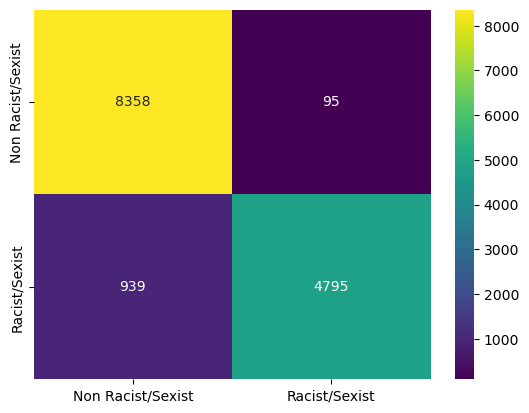

In [56]:
xgb_model = xgb_model.fit(x_train_tfidf, y_train)
xgb_predictions=xgb_model.predict(x_test_tfidf)
accuracy4 = accuracy_score(y_test,xgb_predictions)
sns.heatmap(confusion_matrix(y_test,xgb_predictions),cmap='viridis',annot=True,fmt='.4g',xticklabels=['Non Racist/Sexist','Racist/Sexist'],yticklabels=['Non Racist/Sexist','Racist/Sexist'])
print (classification_report(y_test, xgb_predictions))

# Model Comparison

In [57]:
models=['Naive Bayes','Naive Bayes-tfidf','XGB Classifier','XGB-tfidf']
accuracy_scores=[accuracy1,accuracy2,accuracy3,accuracy4]
performance_df=pd.DataFrame({'Models':models,'Accuracy':accuracy_scores})

In [58]:
performance_df

,Models,Accuracy
0,Naive Bayes,0.927187
1,Naive Bayes-tfidf,0.922464
2,XGB Classifier,0.928879
3,XGB-tfidf,0.927116


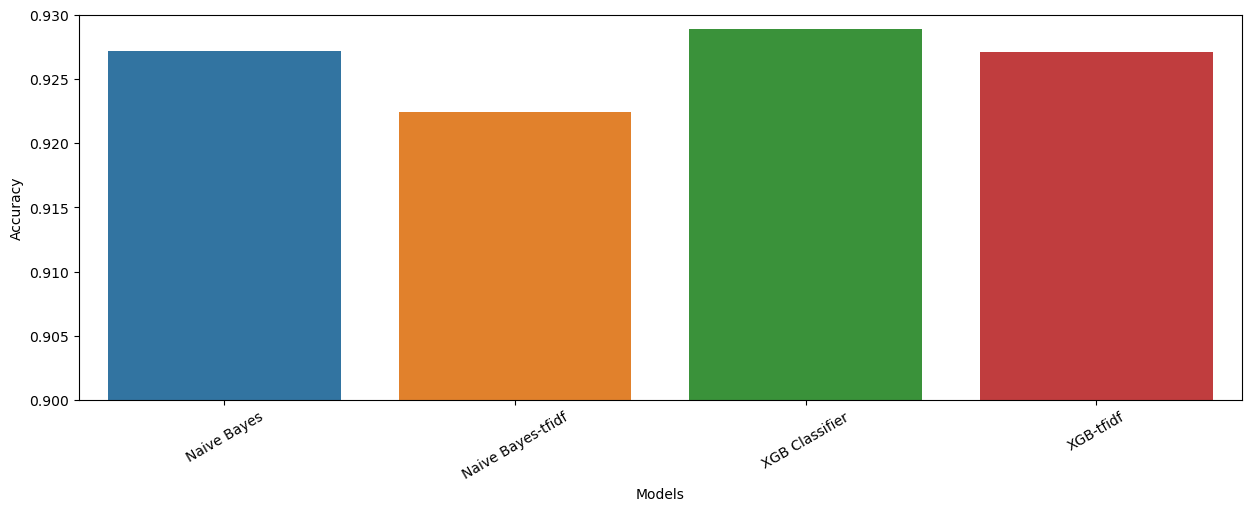

In [63]:
plt.figure(figsize=(15, 5));

sns.barplot(x = 'Models', y ='Accuracy', data = performance_df);

plt.ylim(0.9, 0.93);

plt.xticks(rotation = 30);